# Part A

**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.

**• DATA DESCRIPTION:** The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

**• PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo.


**Steps and tasks:**

1. Import and Understand the data

A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [1]:
import pandas as pd
import numpy as np
import os
import zipfile

In [ ]:
!unzip -u "/content/drive/MyDrive/AIML/plant-seedlings-classification.zip" -d "/content/drive/MyDrive/AIML/Unzipped"

Archive:  /content/drive/MyDrive/AIML/plant-seedlings-classification.zip


B. Map the images from train folder with train labels to form a DataFrame. 

In [2]:
import cv2
from glob import glob
import tensorflow as tf

In [3]:
images_path = "/content/drive/MyDrive/AIML/Unzipped/plant-seedlings-classification/train/"

from glob import glob
image_list = []
class_list=[]
missing=0

for class_folder_name in os.listdir(images_path):
    class_folder_path = os.path.join(images_path, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_rs = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_rs is None: # if the file contain any missing value ignore it
          missing += 1
          continue

         
        image_list.append(image_rs)
        class_list.append(class_label)

FileNotFoundError: ignored

In [ ]:
def resized_images(img):

  img = np.array(img).astype(np.uint8)
  res = cv2.resize(img,(128,128), interpolation = cv2.INTER_CUBIC) #keeping image size 128*128 as the notebook is crashing on 256*256 due to memory issues
  return res

images = [resized_images(img) for img in image_list]

In [ ]:
images[0].shape

(128, 128, 3)

In [ ]:
image_list = np.array(images)
class_list = np.array(class_list)
print("images shape: ", image_list.shape)
print("classes shape: ", class_list.shape)

images shape:  (4750, 128, 128, 3)
classes shape:  (4750,)


In [ ]:
df = pd.DataFrame({'Label':class_list})

In [ ]:
df['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [ ]:
print(image_list.shape)

(4750, 128, 128, 3)


C. Write a function that will select n random images and display images along with its species

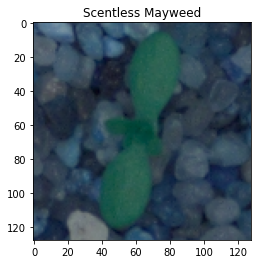

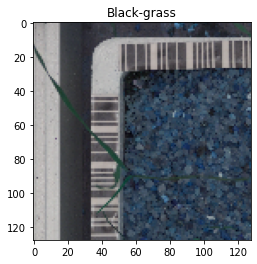

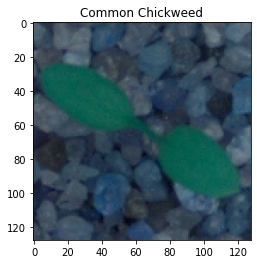

In [ ]:
import random 
import matplotlib.pyplot as plt

images = image_list
labels = np.array(df['Label'])

def select_random_images(num_images):

  random_indices = random.sample(range(len(images)), num_images)
  
  selected_labels = [labels[i] for i in random_indices]
  
  for i in range(num_images):
    plt.imshow(images[random_indices[i]])
    plt.title(selected_labels[i])
    plt.show()

select_random_images(3)


**2. Data preprocessing**

A. Create X & Y from the DataFrame.

In [ ]:
X = image_list
y = df['Label']

B. Encode labels of the images

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y= le.fit_transform(y)

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)

In [ ]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

C. Unify shape of all the images

In [ ]:
X.shape[0]


4750

**D. Normalise all the images.**

In [ ]:
X = X.astype('float32')
X = X.reshape(X.shape[0],128,128,3)
X = X / 255.

# Model training

A. Split the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

B. Create new CNN architecture to train the model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

model1 = Sequential()
model1.add(BatchNormalization(input_shape = (128,128,3)))
model1.add(Convolution2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (128,128,3)))
model1.add(MaxPooling2D(pool_size = 2))

model1.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size = 2))

model1.add(Convolution2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size = 3))

model1.add(Convolution2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size = 2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))

model1.add(Dense(12, activation = 'softmax'))

model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                        

C. Train the model on train data and validate on test data.

In [ ]:
history = model1.fit(X_train,y_train, epochs = 30, validation_data = (X_test, y_test), batch_size = 8)

Epoch 1/30
416/416 [==============================] - 14s 12ms/step - loss: 2.4618 - accuracy: 0.1290 - val_loss: 2.4395 - val_accuracy: 0.1677
Epoch 2/30
416/416 [==============================] - 4s 10ms/step - loss: 2.1479 - accuracy: 0.3095 - val_loss: 1.8664 - val_accuracy: 0.4182
Epoch 3/30
416/416 [==============================] - 4s 10ms/step - loss: 1.6577 - accuracy: 0.4704 - val_loss: 1.6058 - val_accuracy: 0.5116
Epoch 4/30
416/416 [==============================] - 5s 12ms/step - loss: 1.3080 - accuracy: 0.5741 - val_loss: 1.1578 - val_accuracy: 0.6056
Epoch 5/30
416/416 [==============================] - 4s 10ms/step - loss: 1.0950 - accuracy: 0.6469 - val_loss: 0.9389 - val_accuracy: 0.6856
Epoch 6/30
416/416 [==============================] - 5s 12ms/step - loss: 0.9447 - accuracy: 0.6842 - val_loss: 0.9354 - val_accuracy: 0.6821
Epoch 7/30
416/416 [==============================] - 4s 10ms/step - loss: 0.7896 - accuracy: 0.7398 - val_loss: 0.8498 - val_accuracy: 0.723

The model is an overfit and did not converge properly. Using data augmentation to see any improvement

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(X)

In [ ]:
history1 = model1.fit_generator(datagen.flow(X_train, y_train, batch_size=8), 
                    epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


<ipython-input-22-f2f10e86925f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(datagen.flow(X_train, y_train, batch_size=8),


416/416 [==============================] - 15s 35ms/step - loss: 0.9633 - accuracy: 0.7152 - val_loss: 0.6063 - val_accuracy: 0.8112
Epoch 2/30
416/416 [==============================] - 14s 34ms/step - loss: 0.6958 - accuracy: 0.7789 - val_loss: 0.4943 - val_accuracy: 0.8407
Epoch 3/30
416/416 [==============================] - 14s 33ms/step - loss: 0.6526 - accuracy: 0.8003 - val_loss: 0.4607 - val_accuracy: 0.8470
Epoch 4/30
416/416 [==============================] - 14s 33ms/step - loss: 0.6028 - accuracy: 0.8024 - val_loss: 0.4276 - val_accuracy: 0.8611
Epoch 5/30
416/416 [==============================] - 14s 33ms/step - loss: 0.5536 - accuracy: 0.8189 - val_loss: 0.4478 - val_accuracy: 0.8491
Epoch 6/30
416/416 [==============================] - 13s 32ms/step - loss: 0.5172 - accuracy: 0.8232 - val_loss: 0.3786 - val_accuracy: 0.8596
Epoch 7/30
416/416 [==============================] - 14s 32ms/step - loss: 0.4882 - accuracy: 0.8286 - val_loss: 0.5425 - val_accuracy: 0.8246
Epo

45/45 [==============================] - 1s 11ms/step - loss: 0.3006 - accuracy: 0.8919
Validation score: 0.30058714747428894    Validation accuracy: 0.8919298052787781


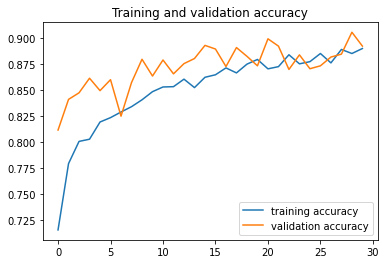

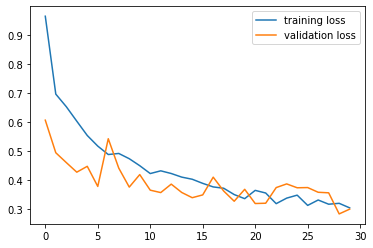

In [ ]:
Score, Accuracy = model1.evaluate(X_test,y_test)
print('Validation score:', Score,'   Validation accuracy:', Accuracy)

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs   = range(len(accuracy))

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')

**D. Select a random image and print actual label and predicted label for the same.**

1/1 [==============================] - 0s 128ms/step
Was predicted  2
Was labeled  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Probabilities:  [[1.15553045e-11 1.81283147e-04 9.99558985e-01 5.99137795e-10
  2.68794480e-07 2.50470097e-04 2.06121231e-12 1.75219455e-07
  2.58066234e-06 8.91791728e-07 3.07409323e-06 2.24541145e-06]]


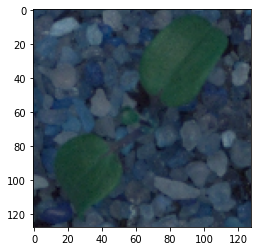

In [ ]:
image_index = 50
plt.imshow(X_test[image_index].reshape(128, 128,3))
pred = model1.predict(X_test[image_index].reshape(-1, 128, 128,3))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

***************************

# Part B


**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.

**• DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.

**• PROJECT OBJECTIVE:** To experiment with various approaches to train an image classifier to predict type of flower from the image.


**Steps and tasks:**

1. Import and Understand the data.

 A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading.

In [5]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 4.4 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=3a58b0151a1339cd0e6d92879d123d6f8eeeaa22bc47bea20b24c00c1a6c890a
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
from tflearn.datasets import oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
X, y = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


B. Print Number of images and shape of the images

In [8]:
print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


C. Print count of each class from y

In [9]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 80,
 1: 80,
 2: 80,
 3: 80,
 4: 80,
 5: 80,
 6: 80,
 7: 80,
 8: 80,
 9: 80,
 10: 80,
 11: 80,
 12: 80,
 13: 80,
 14: 80,
 15: 80,
 16: 80}

## 2. Image Exploration & Transformation

  A. Display 5 random images.

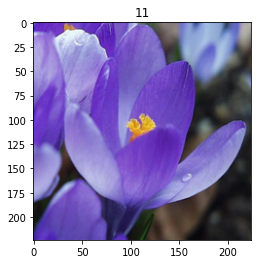

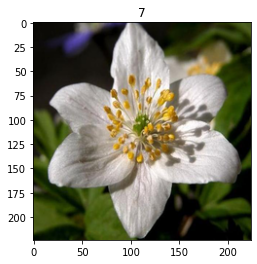

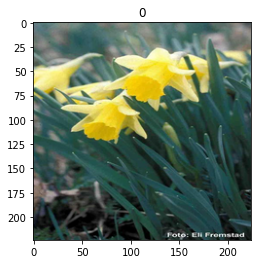

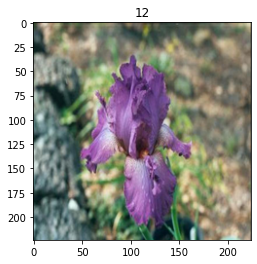

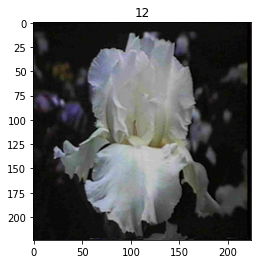

In [11]:
images = X
labels = y

def select_random_images(num_images):

  random_indices = random.sample(range(len(images)), num_images)
  
  selected_labels = [labels[i] for i in random_indices]
  
  for i in range(num_images):
    plt.imshow(images[random_indices[i]])
    plt.title(selected_labels[i])
    plt.show()

select_random_images(5)

B. Select any image from the dataset and assign it to a variable. 

In [12]:
img_org = random.choice(X)

C. Transform the image into grayscale format and display the same.

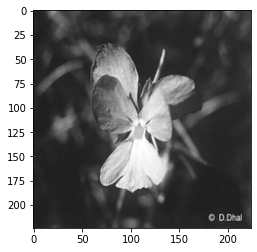

In [13]:
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image,cmap='gray')

D. Apply a filter to sharpen the image and display the image before and after sharpening

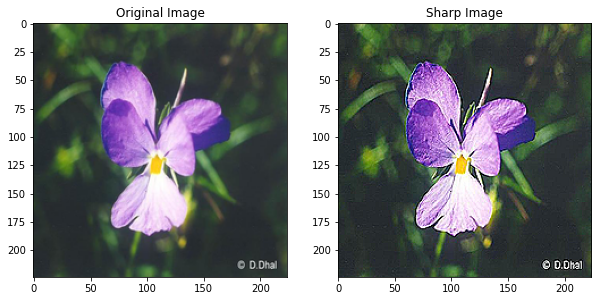

In [14]:
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['Original Image', 'Sharp Image']
plt.figure(figsize=(10,10))
for i,img in enumerate([img_org, sharp_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')


E. Apply a filter to blur the image and display the image before and after blur

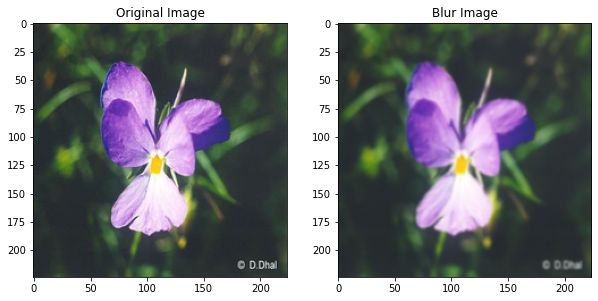

In [15]:
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

img_title = ['Original Image', 'Blur Image']
plt.figure(figsize=(10,10))
for i,img in enumerate([img_org, blur_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img)

F. Display all the 4 images from above questions besides each other to observe the difference.

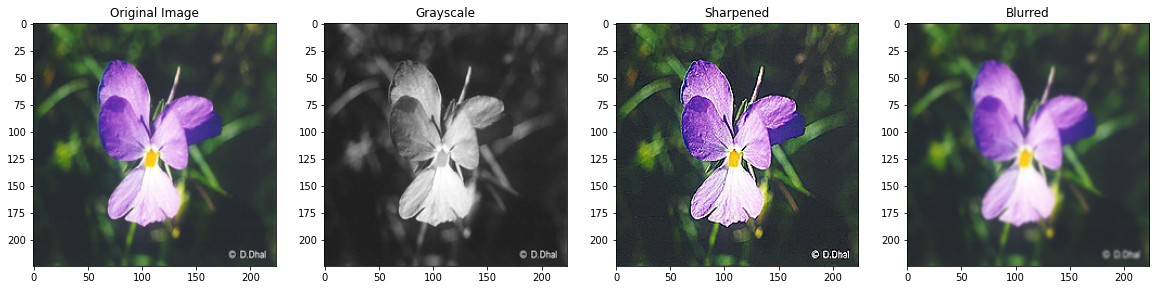

In [16]:
img_title = ['Original Image', 'Grayscale', 'Sharpened', 'Blurred']
plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, sharp_img, blur_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img, cmap='gray')

## **3. Model training and Tuning:**

  A. Split the data into train and test with 80:20 proportion.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

B. Train a model using any Supervised Learning algorithm and share performance metrics on test data

In [18]:
# Reshaping the train and test data as per the SL model requirement

X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], 150528) 
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 150528)
X_test_ML = X_test_ML/255

print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (1088, 150528) (1088,)
Test_Shape: (272, 150528) (272,)


In [19]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_ML, y_train)

SVC()

In [20]:
svm_Accuracy=svm.score(X_train_ML, y_train)
print("Train Accuracy : ", svm_Accuracy)

svm_Accuracy=svm.score(X_test_ML, y_test)
print("Test Accuracy : ", svm_Accuracy)

Train Accuracy :  0.9108455882352942
Test Accuracy :  0.4889705882352941


C. Train a model using Neural Network and share performance metrics on test data

In [21]:
import tensorflow 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [22]:
le = LabelEncoder()
y_train_NN = le.fit_transform(y_train)
y_test_NN = le.fit_transform(y_test)


y_train_NN = np_utils.to_categorical(y_train_NN)
y_test_NN = np_utils.to_categorical(y_test_NN)
print(y_train_NN.shape, y_test_NN.shape)

(1088, 17) (272, 17)


In [ ]:
model = Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(17, activation='softmax'))

adam = optimizers.SGD(learning_rate= 0.01)
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
histroy = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=50, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8294 - acc: 0.0744 - val_loss: 2.8320 - val_acc: 0.1213
Epoch 2/50
  32/1088 [..............................] - ETA: 0s - loss: 2.8159 - acc: 0.1250

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 1s 666us/sample - loss: 2.8100 - acc: 0.0947 - val_loss: 2.8306 - val_acc: 0.0662
Epoch 3/50
1088/1088 [==============================] - 1s 654us/sample - loss: 2.7915 - acc: 0.0956 - val_loss: 2.8275 - val_acc: 0.0919
Epoch 4/50
1088/1088 [==============================] - 1s 657us/sample - loss: 2.7698 - acc: 0.1204 - val_loss: 2.8223 - val_acc: 0.1397
Epoch 5/50
1088/1088 [==============================] - 1s 649us/sample - loss: 2.7437 - acc: 0.1195 - val_loss: 2.8127 - val_acc: 0.1507
Epoch 6/50
1088/1088 [==============================] - 1s 658us/sample - loss: 2.6930 - acc: 0.1507 - val_loss: 2.8047 - val_acc: 0.1397
Epoch 7/50
1088/1088 [==============================] - 1s 669us/sample - loss: 2.6950 - acc: 0.1415 - val_loss: 2.7941 - val_acc: 0.1397
Epoch 8/50
1088/1088 [==============================] - 1s 664us/sample - loss: 2.6800 - acc: 0.1388 - val_loss: 2.7801 - val_acc: 0.1654
Epoch 9/50
1088/1088 [=======================

Text(0.5, 1.0, 'Training and validation loss')

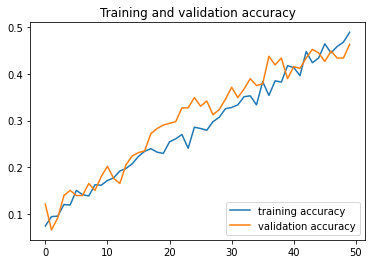

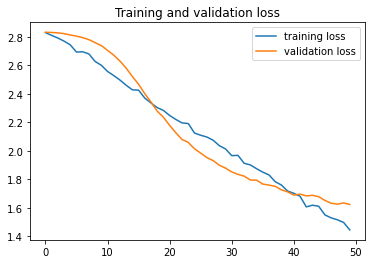

In [ ]:
accuracy      = histroy.history['acc']
val_accuracy  = histroy.history['val_acc']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
Score, Accuracy = model.evaluate(X_test_ML,y_test_NN)
print('Validation score:', Score,'   Validation accuracy:', Accuracy)

Validation score: 1.6244745394762825    Validation accuracy: 0.4632353


D. Train a model using a basic CNN and share performance metrics on test data. 

In [23]:
X_train_CNN = X_train.astype('float32')
X_train_CNN = X_train_CNN.reshape(X_train_CNN.shape[0], 224, 224, 3) 
X_train_CNN = X_train_CNN/255

X_test_CNN = X_test.astype('float32')
X_test_CNN = X_test_CNN.reshape(X_test_CNN.shape[0], 224, 224, 3)
X_test_CNN = X_test_CNN/255

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (224, 224, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Convolution2D(filters = 128, kernel_size = 3, activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 


model_1.add(Dense(units = 128,activation = 'relu'))
model_1.add(Dense(units = 64, activation = 'relu'))
model_1.add(Dense(units = 32, activation = 'relu'))

model_1.add(Dense(units = 17, activation = 'softmax'))

opt = optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [25]:
history1 = model_1.fit(X_train_CNN, y_train_NN, validation_data=(X_test_CNN, y_test_NN), epochs=50, batch_size = 8, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 2.7389 - acc: 0.1140

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 11s 10ms/sample - loss: 2.7389 - acc: 0.1140 - val_loss: 2.7887 - val_acc: 0.0919
Epoch 2/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.1871 - acc: 0.2656 - val_loss: 2.5873 - val_acc: 0.1434
Epoch 3/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.8409 - acc: 0.3888 - val_loss: 2.2390 - val_acc: 0.2904
Epoch 4/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.5631 - acc: 0.4550 - val_loss: 1.9113 - val_acc: 0.3860
Epoch 5/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.2826 - acc: 0.5754 - val_loss: 1.5404 - val_acc: 0.4816
Epoch 6/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 1.0993 - acc: 0.6388 - val_loss: 1.4807 - val_acc: 0.4963
Epoch 7/50
1088/1088 [==============================] - 3s 3ms/sample - loss: 0.9278 - acc: 0.6949 - val_loss: 1.5088 - val_acc: 0.5037
Epoch 8/50
1088/1088 [==============================] - 3

Text(0.5, 1.0, 'Training and validation loss')

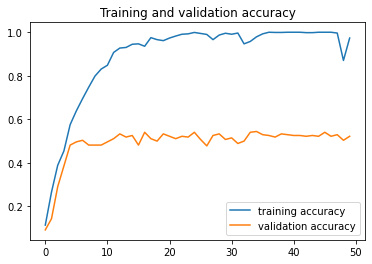

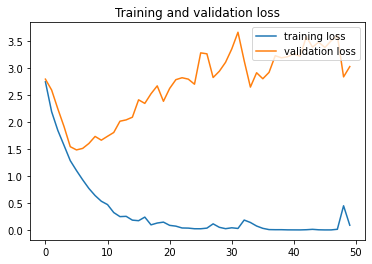

In [26]:
accuracy      = history1.history['acc']
val_accuracy  = history1.history['val_acc']
loss     = history1.history['loss']
val_loss = history1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input


vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape = (224, 224, 3))

# Freeze all the layers except for the last few layers: 
for layer in vgg_conv.layers[:-5]:
    layer.trainable = False
 
 
# Create the model
model_vgg = Sequential()
 
# Add the vgg convolutional base model
model_vgg.add(vgg_conv)
 
# Add new layers
model_vgg.add(Flatten())
model_vgg.add(Dense(512, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.3))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.3))

# Output layer
model_vgg.add(Dense(17, activation='softmax'))
model_vgg.summary() 

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                       

In [33]:
sgd= optimizers.Adam(lr= 0.01)
model_vgg.compile(loss="categorical_crossentropy", optimizer=sgd,
                  metrics=["accuracy"])

In [34]:
vgg_history = model_vgg.fit(X_train_CNN, y_train_NN, validation_data=(X_test_CNN, y_test_NN), epochs=50, batch_size = 32, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 13s 12ms/sample - loss: 2.8454 - acc: 0.0469 - val_loss: 2.8338 - val_acc: 0.0588
Epoch 2/50
1088/1088 [==============================] - 8s 8ms/sample - loss: 2.8384 - acc: 0.0561 - val_loss: 2.8335 - val_acc: 0.0588
Epoch 3/50
1088/1088 [==============================] - 8s 8ms/sample - loss: 2.8371 - acc: 0.0496 - val_loss: 2.8335 - val_acc: 0.0588
Epoch 4/50
 960/1088 [=========================>....] - ETA: 0s - loss: 2.8376 - acc: 0.0500

KeyboardInterrupt: ignored

The model is not converging and loss is too high for test set and low accuracy. The model is an overfit looking at the accuracy for train and test.

Using Data augmentation since the number of images in each class are too less. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen1 = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen1.fit(X)

In [ ]:
history2 = model_1.fit_generator(datagen1.flow(X_train_CNN, y_train_NN, batch_size=8), 
                    epochs=30, validation_data=(X_test_CNN, y_test_NN))

Epoch 1/30
  1/136 [..............................] - ETA: 15s - batch: 0.0000e+00 - size: 8.0000 - loss: 8.0530 - acc: 0.2500

<ipython-input-63-486568be8827>:1: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model_1.fit_generator(datagen1.flow(X_train_CNN, y_train_NN, batch_size=8),


136/136 [==============================] - 12s 89ms/step - batch: 67.5000 - size: 8.0000 - loss: 2.3131 - acc: 0.3805 - val_loss: 1.5333 - val_acc: 0.4926
Epoch 2/30
136/136 [==============================] - 12s 87ms/step - batch: 67.5000 - size: 8.0000 - loss: 1.6748 - acc: 0.4513 - val_loss: 1.3522 - val_acc: 0.5588
Epoch 3/30
136/136 [==============================] - 12s 88ms/step - batch: 67.5000 - size: 8.0000 - loss: 1.5631 - acc: 0.4623 - val_loss: 1.3291 - val_acc: 0.5625
Epoch 4/30
136/136 [==============================] - 12s 88ms/step - batch: 67.5000 - size: 8.0000 - loss: 1.4893 - acc: 0.5009 - val_loss: 1.3041 - val_acc: 0.5625
Epoch 5/30
136/136 [==============================] - 13s 99ms/step - batch: 67.5000 - size: 8.0000 - loss: 1.4327 - acc: 0.5018 - val_loss: 1.2849 - val_acc: 0.5772
Epoch 6/30
136/136 [==============================] - 13s 98ms/step - batch: 67.5000 - size: 8.0000 - loss: 1.3578 - acc: 0.5322 - val_loss: 1.2751 - val_acc: 0.5919
Epoch 7/30
136/

Text(0.5, 1.0, 'Training and validation loss')

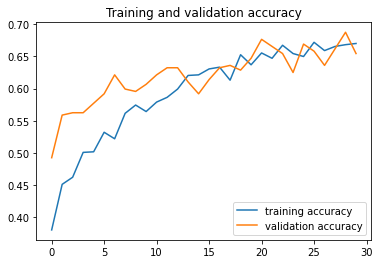

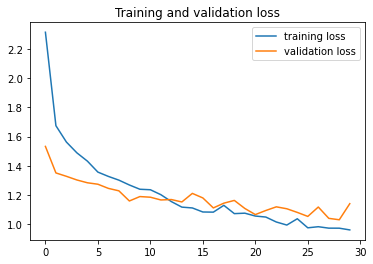

In [ ]:
accuracy      = history2.history['acc']
val_accuracy  = history2.history['val_acc']
loss     = history2.history['loss']
val_loss = history2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
Score, Accuracy = model_1.evaluate(X_test_CNN,y_test_NN)
print('Validation score:', Score,'   Validation accuracy:', Accuracy)

Validation score: 1.1421940046198227    Validation accuracy: 0.6544118


CNN model after augmentation is best among the 3 with highest accuracy of 65% on test data. We will predict the prediction image on this model 

E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

Image width: 224
Image width: 224


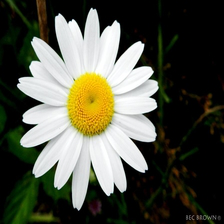

In [ ]:
from PIL import Image   # pip install pillow
  
Image_name = '/content/drive/MyDrive/AIML/Prediction (1).jpg'
with Image.open(Image_name) as image: 
    width, height = image.size 

print("Image width:",width)    

print("Image width:",height)
    
Image.open(Image_name)

In [ ]:
pred_image = cv2.imread('/content/drive/MyDrive/AIML/Prediction (1).jpg')
img_batch = np.expand_dims(pred_image, axis=0)

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

img_preprocessed = preprocess_input(img_batch)
prediction = model_1.predict(img_preprocessed)
prediction

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

The model has predicted the image as class 2. Class 2 as per below image is Daisy. The model has predicted the image correctly. 

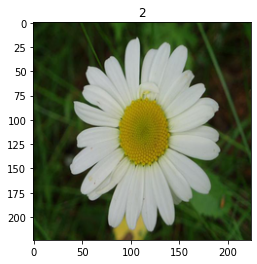

In [ ]:
#Checking a random image and its label using the function already defined to see if the predicted label is correct. 
select_random_images(1)